<a href="https://colab.research.google.com/github/Pramod1902/AIML-2025/blob/main/2303a51709_B10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prediction of South Indian travel Destinations using Holiday Data
1. Identify the top 5 attributes for south indian destinations
2. Identify the attribute with most liked travel spots
3. Find the max and min attributes of choice  for south india tourism
5. Identify the sports with most attributes in south India
6. apply either classification model or clustering model to evaluate the dataset

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [20]:
data = {
    'Destination': ['Coorg', 'Mysore', 'Ooty', 'Kodaikanal', 'Chennai', 'Munnar', 'Goa', 'Alleppey', 'Pondicherry', 'Wayanad'],
    'Budget': [1500, 1200, 1800, 1600, 1000, 1700, 2000, 1300, 1100, 1400],  # Average budget per day in INR
    'Activity_Type': ['Trekking', 'Historical', 'Trekking', 'Nature Walk', 'Beach', 'Trekking', 'Water Sports', 'Backwater', 'Beach', 'Trekking'],
    'Location_Type': ['Hill Station', 'Heritage', 'Hill Station', 'Hill Station', 'Beach', 'Hill Station', 'Beach', 'Backwater', 'Beach', 'Hill Station'],
    'Visitor_Rating': [4.5, 4.2, 4.6, 4.4, 3.8, 4.7, 4.8, 4.5, 4.1, 4.3]  # 1 to 5 scale
}

df = pd.DataFrame(data)

print(df)

   Destination  Budget Activity_Type Location_Type  Visitor_Rating
0        Coorg    1500      Trekking  Hill Station             4.5
1       Mysore    1200    Historical      Heritage             4.2
2         Ooty    1800      Trekking  Hill Station             4.6
3   Kodaikanal    1600   Nature Walk  Hill Station             4.4
4      Chennai    1000         Beach         Beach             3.8
5       Munnar    1700      Trekking  Hill Station             4.7
6          Goa    2000  Water Sports         Beach             4.8
7     Alleppey    1300     Backwater     Backwater             4.5
8  Pondicherry    1100         Beach         Beach             4.1
9      Wayanad    1400      Trekking  Hill Station             4.3


In [21]:
df_encoded = pd.get_dummies(df, columns=['Activity_Type', 'Location_Type'])

In [22]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded.drop('Destination', axis=1))

In [23]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)


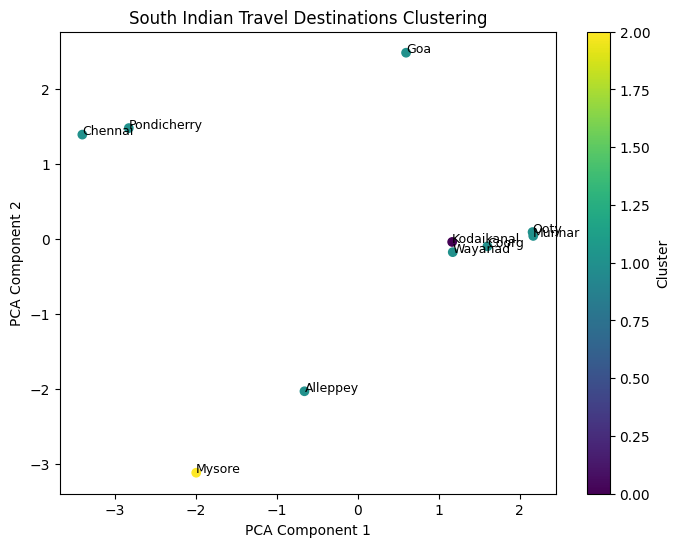

In [24]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Cluster'], cmap='viridis', label='Clusters')

for i, destination in enumerate(df['Destination']):
    plt.text(pca_components[i, 0], pca_components[i, 1], destination, fontsize=9)

plt.title('South Indian Travel Destinations Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [25]:
print("Cluster Centers (Centroids):")
print(kmeans.cluster_centers_)

print("\nCluster Assignments for Each Destination:")
print(df[['Destination', 'Cluster']])


Cluster Centers (Centroids):
[[ 0.46056619  0.03515813 -0.33333333 -0.5        -0.33333333  3.
  -0.81649658 -0.33333333 -0.33333333 -0.65465367 -0.33333333  1.        ]
 [ 0.04934638  0.07910579  0.08333333  0.125      -0.33333333 -0.33333333
   0.20412415  0.08333333  0.08333333  0.16366342 -0.33333333  0.        ]
 [-0.8553372  -0.66800443 -0.33333333 -0.5         3.         -0.33333333
  -0.81649658 -0.33333333 -0.33333333 -0.65465367  3.         -1.        ]]

Cluster Assignments for Each Destination:
   Destination  Cluster
0        Coorg        1
1       Mysore        2
2         Ooty        1
3   Kodaikanal        0
4      Chennai        1
5       Munnar        1
6          Goa        1
7     Alleppey        1
8  Pondicherry        1
9      Wayanad        1


In [26]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.085
